# Start

In [ ]:
import tbmodels
from yambopy import *
import matplotlib.pyplot as plt
from yambopy.lattice import car_red, red_car
import matplotlib.pylab as pylab
from pylab import rcParams
from matplotlib.ticker import MultipleLocator
import matplotlib.lines as mlines
import scienceplots
plt.style.use(['science'])
WORK_PATH = ''


In [2]:
# Istance of useful classes
NK = 6
NQ = 6
lat_k = YamboLatticeDB.from_db_file(f'{WORK_PATH}/BSE/06_BSE_triplet_slepc/SAVE/')
lat_q = YamboLatticeDB.from_db_file(f'{WORK_PATH}/BSE/06_BSE_triplet_slepc/SAVE/')
# lat_q.expand_kpoints()
# lat_k.expand_kpoints()

# Create instance of real space Hamiltonian in MLWF basis
hrk=HR(f'{WORK_PATH}/nscf-wannier-{NK}x{NK}x{NK}/LiF')
hrq = HR(f'{WORK_PATH}/nscf-wannier-{NQ}x{NQ}x{NQ}/LiF')
original_nnkp = NNKP_Grids(f'{WORK_PATH}/nscf-wannier-{NK}x{NK}x{NK}//LiF')

nnkp_kgrid = NNKP_Grids(f'{WORK_PATH}/nscf-wannier-{NK}x{NK}x{NK}//LiF')
nnkp_qgrid = NNKP_Grids(f'{WORK_PATH}/nscf-wannier-{NQ}x{NQ}x{NQ}//LiF')
print('start grids')
# We need all these auxiliary grids for wannierization of the BSE Hamiltonian
# nnkp_kgrid.get_kpbover2_grid(nnkp_kgrid)
nnkp_kgrid.get_wannier90toyambo(lat_k,yambo=False)
nnkp_qgrid.get_wannier90toyambo(lat_q,yambo=False)

nnkp_qgrid.get_qpb_grid(nnkp_qgrid)
nnkp_kgrid.get_kpb_grid(nnkp_kgrid)
nnkp_kgrid.get_kmq_grid(nnkp_qgrid)


Time for HR.__init__() : 0.011174201965332031 , read : 0.010608196258544922 , headstring 0.0005660057067871094
Time for HR.__init__() : 0.008853912353515625 , read : 0.008540153503417969 , headstring 0.00031375885009765625
Time for NNKP.__init__() : 0.007324934005737305
Time for NNKP.__init__() : 0.005873203277587891
Time for NNKP.__init__() : 0.0052127838134765625
start grids


(array([[[-0.        ,  0.        ,  0.        ],
         [-0.        ,  0.        , -0.16666667],
         [ 0.16666667,  0.16666667,  0.16666667],
         ...,
         [ 0.33333333, -0.16666667,  0.5       ],
         [ 0.5       ,  0.66666667,  0.16666667],
         [-0.5       , -0.66666667, -0.16666667]],
 
        [[-0.        ,  0.        ,  0.16666667],
         [-0.        ,  0.        ,  0.        ],
         [ 0.16666667,  0.16666667,  0.33333333],
         ...,
         [-0.66666667, -0.16666667, -0.33333333],
         [ 0.5       ,  0.66666667,  0.33333333],
         [-0.5       ,  0.33333333,  0.        ]],
 
        [[-0.16666667, -0.16666667, -0.16666667],
         [-0.16666667, -0.16666667, -0.33333333],
         [-0.        ,  0.        ,  0.        ],
         ...,
         [ 0.16666667, -0.33333333,  0.33333333],
         [ 0.33333333, -0.5       ,  0.        ],
         [ 0.33333333,  0.16666667, -0.33333333]],
 
        ...,
 
        [[-0.33333333,  0.16666667

# H2P initialization

In [3]:
model = TBMODEL.from_wannier_files(
    hr_file=f'{WORK_PATH}/nscf-wannier-{NK}x{NK}x{NK}/LiF_hr.dat',
    wsvec_file=f'{WORK_PATH}/nscf-wannier-{NK}x{NK}x{NK}/LiF_wsvec.dat',
    #xyz_file=f'{WORK_PATH}/w90files/hBN_centres.xyz',
    win_file=f'{WORK_PATH}/nscf-wannier-{NK}x{NK}x{NK}/LiF.win'
)
model.set_mpgrid(nnkp_kgrid)

fermie = 1.0
model.solve_ham_from_hr(lat_k, hrk, fermie=fermie)

print ('before h2p')
h2p = H2P(model, f'{WORK_PATH}/BSE/06_BSE_triplet_slepc/SAVE', kmpgrid=nnkp_kgrid,qmpgrid=nnkp_qgrid,bse_nv=3,bse_nc=1,
          cpot=None,kernel_path=f'{WORK_PATH}/BSE/06_BSE_triplet_slepc/',
          excitons_path=f'{WORK_PATH}/BSE/06_BSE_triplet_slepc/',TD=False, method='skip-diago',run_parallel=True,dimslepc=10)

print('built h2p')
#if (not method=='skip-diago'):
#h2p.solve_H2P()
h2p.convert_to_wannier90()
print('writing files')

Diagonalization took 0.009 s
before h2p
216 kpoints expanded to 216
216 kpoints expanded to 216
Method skip-diago running only for post-processing of wannier exc data: Remember to set dimslepc
Using the Full Brillouin zone.
Reading excitonic eigenvalues and eigenvectors in 0.75 seconds.
built h2p
*** Converted all the yambo grids to wannier90 grids. ***
writing files


In [4]:
from yambopy.wannier.wann_Mssp import *

In [ ]:
# Try for 2nd band only 
wfdb = YamboWFDB(path=f'{WORK_PATH}/BSE/06_BSE_triplet_slepc/',latdb=lat_k, bands_range=[1,2])


Loading Wavefunctions:   0%|          | 0/216 [00:00<?, ?it/s]

Loading Miller Indices: 100%|██████████| 216/216 [00:00<00:00, 45978.97it/s]


In [19]:
h2p.Mkmq = compute_overlap_kmq(wfdb,nnkp_kgrid)

Expanding Wavefunctions full BZ: 100%|██████████| 216/216 [00:00<00:00, 2828.81it/s]


Converted to Wannier90 grids.


In [36]:
h2p.Mkpb = compute_overlap_kkpb(wfdb,nnkp_kgrid)


Expanding Wavefunctions full BZ: 100%|██████████| 216/216 [00:00<00:00, 7257.40it/s]


Converted to Wannier90 grids.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215



#       LiF MMn
Looking at the LiF.mmn file by wannier90 we find for k,k+b:
    10         216           8
       1       2       0       0       0
    0.953701260930    0.284634768544

we find:

In [40]:
h2p.Mkpb[0][0]

array([[0.31457207+0.93935489j]])

In [8]:
h2p.h2peigvec, h2p.h2peigvec_vck = h2p.fix_and_align_phases()

*** Fixed global and relative phases across Q ***


In [9]:
h2p.Mssp = None
h2p.Amn = None
t = 3

In [10]:
h2p.Mssp = compute_Mssp(h2p,nnkp_kgrid,nnkp_qgrid,trange=t)

0
1
2
3


/opt/miniconda3/envs/yambopy/lib/python3.10/site-packages/yambopy/wannier/wann_Mssp.py:106: ComplexWarning: Casting complex values to real discards the imaginary part
  Mssp[t,tp,iq,ib] = Mssp_ttp


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


# Write overlaps

In [11]:
t=3
tp=t

h2p.write_exc_overlap(seedname='LiF',trange=np.arange(0,t), tprange=np.arange(0,tp),alpha=1.0)
h2p.write_exc_eig(seedname='LiF',trange=np.arange(0,t))
h2p.write_exc_nnkp(seedname='LiF',trange=np.arange(0,t))


In [12]:
h2p.check_hermitian(h2p.Mssp)

Hermitian deviation: 4.452e-14


# Omega

In [13]:
def omega_I(Mssp,norm=1,):
    '''Calculate Omega I as in the electronic case'''
    sum_o_I = 0

    nt,ntp, nq, nb = Mssp.shape
    w_b = 1.894212
    for bi in range(nb):
        for qi in range(nq):
            sum_ms2 = 0
            for s1 in range(nt):
                for s2 in range(ntp):
                    sum_ms2+= np.abs(Mssp[s1,s2,qi,bi]*norm)**2
            sum_o_I+= w_b*(nt-sum_ms2)

    return 1/nq * sum_o_I

In [14]:
rec_lat = [[-1.541317 , -1.541317  , 1.541317],
[ 1.541317 ,  1.541317  , 1.541317],
[-1.541317 ,  1.541317  ,-1.541317]]

B_vec = np.dot(h2p.kmpgrid.b_list[0], rec_lat)
w_b = 1.894212

def r_n(Mssp, t,norm):
    _,_, nq, nb = Mssp.shape
    r_n_sum = 0 
    for qi in range(nq):
        for bi in range(nb):
            
            r_n_sum += w_b * B_vec[bi] * (Mssp[t,t, qi,bi]*norm - 1)

    return r_n_sum/nq *1j

def omega_D(Mssp,norm):
    nt,ntp, nq, nb = Mssp.shape
    omega_D_sum = 0
    r_n_sum = np.zeros(shape=(nt,3),dtype=complex)

    for t in range(nt):
        r_n_sum[t] = r_n(Mssp,t=t, norm=norm)

    for qi in range(nq):
        for bi in range(nb):
            sum_t = 0
            for t in range(nt):
                sum_t += (-np.imag(np.log(Mssp[t,t,qi,bi]*norm)) - np.dot(B_vec[bi],r_n_sum[t]))**2
            omega_D_sum+=w_b*sum_t

    return omega_D_sum/nq

In [15]:
def omega_OD(Mssp,norm=1):
    nt,ntp, nq, nb = Mssp.shape
    omega_summed_OD = 0
    for qi in range(nq):
        for bi in range(nb):
            summed_m = 0
            for t in range(nt):
                for tp in range(ntp):
                    if t is not tp:
                        summed_m+=np.abs(Mssp[t,tp,qi,bi]*norm)**2
            omega_summed_OD+=summed_m*w_b
            
    return omega_summed_OD/nq

In [16]:
def arcos2_omega(Mssp, norm=1):
    """
    Calculate the arccosine squared omega value.
    
    Parameters:
        Mssp: ndarray
            Shape (nt, ntp, nq, nb)
        norm: float
            Normalization factor
        
    Returns:
        float: arccosine squared omega value
    """
    omega_sum = 0

    nt,ntp, nq, nb = Mssp.shape
    w_b = 1.894212
    for s1 in range(nt):
        for s2 in range(ntp):

            for qi in range(nq):
                for bi in range(nb):
                    omega_sum+= w_b*np.arccos(np.abs(Mssp[s1,s2,qi,bi]*norm))**2

    return 1/nq * omega_sum
    # return np.arccos(omega_sum / (nq * nt * ntp)) ** 2

In [17]:

normie=h2p.ntransitions*3
normie=1


print(f"Omega_I = {omega_I(h2p.Mssp, norm=normie)}")
print(f"Omega_D = {omega_D(h2p.Mssp, norm=normie)}")
print(f"Omega_OD = {omega_OD(h2p.Mssp, norm=normie)}")
print(f"arcos^2 = {arcos2_omega(h2p.Mssp, norm=normie)}")

Omega_I = 36.078089634775615
Omega_D = (-2.840161877333256e-23+0j)
Omega_OD = 3.8423413348704223
arcos^2 = 260.45442717164883


/var/folders/z_/rt1ygshx103gv6f2nm5ws1wm0000gn/T/ipykernel_38784/2773094111.py:30: RuntimeWarning: invalid value encountered in log
  sum_t += (-np.imag(np.log(Mssp[t,t,qi,bi]*norm)) - np.dot(B_vec[bi],r_n_sum[t]))**2


In [26]:
def G_k(Mssp,q):
    """ Only works for 1 band case, should vanish for each q """
    nt,ntp, nq, nb = Mssp.shape
    G_k_sum = 0
    for bi in range(nb):
        G_k_sum+=w_b*np.imag(np.log(Mssp[0,0,q,bi]))
    return G_k_sum*4j

In [27]:
h2p.Mssp.shape

(3, 3, 216, 8)

In [28]:
G_k(h2p.Mssp,0)

/var/folders/z_/rt1ygshx103gv6f2nm5ws1wm0000gn/T/ipykernel_10732/2313633500.py:6: RuntimeWarning: invalid value encountered in log
  G_k_sum+=w_b*np.imag(np.log(Mssp[0,0,q,bi]))


0j

# Build Excitonic model

Time for HR.__init__() : 0.001934051513671875 , read : 0.0018639564514160156 , headstring 7.009506225585938e-05
Diagonalization took 0.006 s


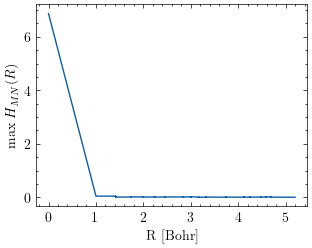

In [29]:
exc_path = WORK_PATH+'/exc_6x6x6/3bands'
model_exc = TBMODEL.from_wannier_files(
    hr_file=f'{exc_path}/LiF_exc_hr.dat',
    # wsvec_file=f'{exc_path}/LiF_exc_wsvec.dat',
    #xyz_file=f'{WORK_PATH}/w90files/hBN_centres.xyz',
    # win_file=f'{exc_path}/LiF_exc.win'
)
model_exc.set_mpgrid(nnkp_kgrid)
lat_exc = YamboLatticeDB.from_db_file(f'{WORK_PATH}/nscf-{NK}x{NK}x{NK}/SAVE/')
# Create instance of real space Hamiltonian in MLWF basis
hr_exc=HR(f'{exc_path}/LiF_exc')

fermie = 1.0
model_exc.solve_ham_from_hr(lat_exc, hr_exc, fermie=fermie  )

R_dist, max_hr_p=model_exc.decay_R(lat_exc.lat, hr_exc,fermie = 3.0)

In [30]:
from qepy.lattice import calculate_distances
# Define path in reduced coordinates using Class Path
npoints =23
path_kpoints = Path([
              [[0.5,0.5,  0.5],'L'],  
              [[  0.0,  0.0,  0.0],'$\Gamma$'],
              [[  0.5,  0.0,  0.5],'X'],
              [[  0.5,  0.250,  0.750],'W'],
              [[  0.5,  0.50,  0.50],'L']
              ],[npoints+2,npoints+10,npoints-11,npoints-1] )
# Generate list of q-points with weights
klist = path_kpoints.get_klist()
kpoints_dists = calculate_distances(klist[:,:3])

/opt/miniconda3/envs/yambopy/lib/python3.10/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, 'Exciton energy (eV)')

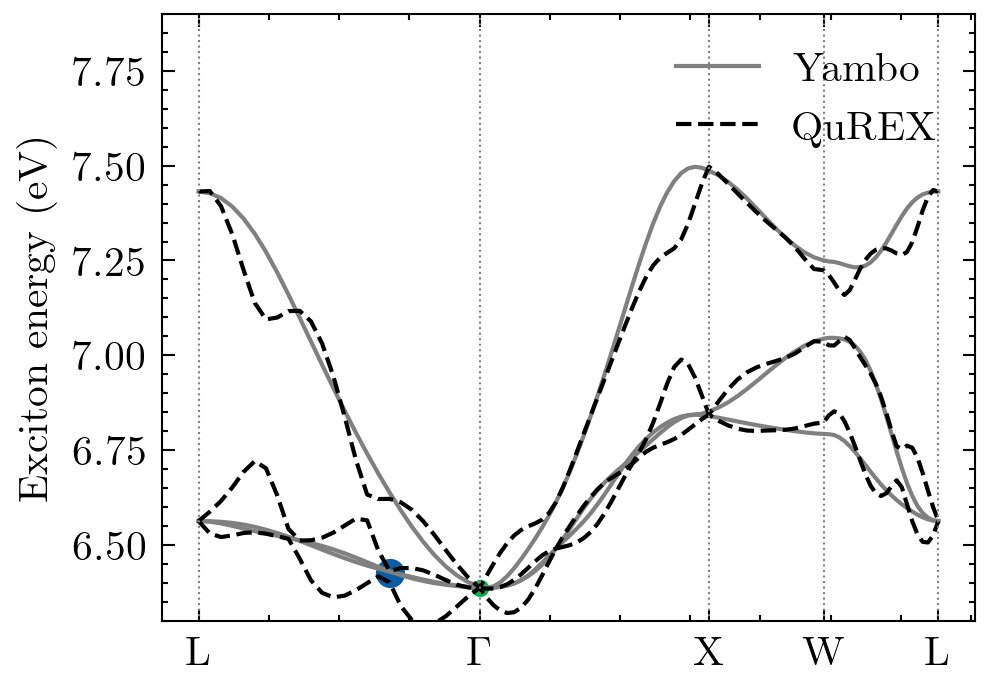

In [31]:
plt.figure(dpi=300)
bands_path = f"{WORK_PATH}/exc_6x6x6/06_BSE_triplet_slepc/o-exc-bands.excitons_interpolated"

excbands = np.loadtxt(bands_path,usecols=(0,1,2,3))
k_yambo = excbands[:,0]
exc_e = excbands[:,1:] 
plt.plot(kpoints_dists, exc_e[:,:3], label='Yambo', color='grey', linestyle='-')
plt.plot(kpoints_dists, model_exc.eigenval(k=klist[:,:3]), color='black', linestyle='--', label='TB bands')
plt.scatter(kpoints_dists[17], h2p.h2peigv[6][0])
plt.scatter(kpoints_dists[25], h2p.h2peigv[0][0], s=10)


plt.vlines(path_kpoints.distances,ymin=6, ymax=8, color='grey', linestyle=':', linewidth=0.5)
legend_entries = [
    mlines.Line2D([], [], color='grey', ls ='-', label='Yambo'),
    mlines.Line2D([], [], color='black', ls = '--', label='QuREX'),
]
plt.legend(handles=legend_entries, loc='upper right', fontsize=10)
plt.ylim(6.3,7.9)
plt.xticks(path_kpoints.distances, path_kpoints.klabels)
plt.ylabel('Exciton energy (eV)')


# Tests

Text(0.5, 1.0, 'Distribution of |Mssp|')

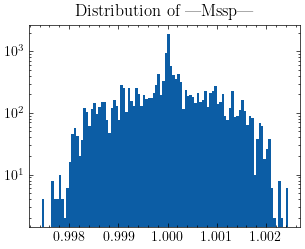

In [32]:
import matplotlib.pyplot as plt
plt.hist(np.abs(h2p.Mssp/100 + 1).flatten(), bins=100, log=True)
plt.title("Distribution of |Mssp|")


In [33]:
from scipy.spatial import cKDTree
import numpy as np
import random

def build_periodic_kdtree(kgrid, n_images=1):
    shifts = np.array(np.meshgrid(
        *[np.arange(-n_images, n_images + 1)] * 3)).T.reshape(-1, 3)
    nk = len(kgrid)
    n_shifts = len(shifts)
    kpts_images = (kgrid[:, None, :] + shifts[None, :, :]).reshape(-1, 3)
    origin_indices = np.repeat(np.arange(nk), n_shifts)
    tree = cKDTree(kpts_images)
    return tree, kpts_images, origin_indices

def check_kmq_consistency(kgrid, qgrid, kmq_table, tol=1e-6, ntest_k=10, ntest_q=5, sign="+"):
    nk = kgrid.shape[0]
    nq = qgrid.shape[0]
    failures = []

    random.seed(42)
    ik_list = random.sample(range(nk), min(ntest_k, nk))
    iq_list = random.sample(range(nq), min(ntest_q, nq))

    tree, _, origin_indices = build_periodic_kdtree(kgrid, n_images=1)

    for ik in ik_list:
        k = kgrid[ik]
        for iq in iq_list:
            q = qgrid[iq]
            kmq = (k - q) if sign == "+" else (q - k)

            # Match using periodic KDTree
            _, closest_idx = tree.query(kmq)
            manual_idx = origin_indices[closest_idx]

            # Table-based value
            table_idx = int(kmq_table[ik, iq, 1])

            if np.linalg.norm(kgrid[manual_idx] - kgrid[table_idx]) > tol:
                failures.append((ik, iq, manual_idx, table_idx, kgrid[manual_idx], kgrid[table_idx]))

    if failures:
        print(f"❌ Found {len(failures)} mismatch(es):")
        for f in failures[:10]:
            ik, iq, midx, tidx, mk, tk = f
            print(f"[ik={ik}, iq={iq}] → manual k = {mk}, table k = {tk}")
    else:
        print("✅ All tested kmq table entries are consistent.")


In [34]:
check_kmq_consistency(
    kgrid=nnkp_kgrid.k,
    qgrid=nnkp_qgrid.k,
    kmq_table=nnkp_kgrid.kmq_grid_table,
    tol=1e-6,
    ntest_k=20,
    ntest_q=20,
    sign="+"
)


✅ All tested kmq table entries are consistent.
